In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, log_loss, f1_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [10]:
data=pd.read_csv('heart_dataset_cleaned.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,1,172,0,0.0,2,0
1,49,1,3,160,180,0,1,156,0,1.0,1,1
2,37,0,2,130,283,0,2,98,0,0.0,2,0
3,48,1,1,138,214,0,1,108,1,1.5,1,1
4,54,0,3,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,0,4,110,264,0,1,132,0,1.2,1,1
913,68,0,1,144,193,1,1,141,0,3.4,1,1
914,57,0,1,130,131,0,1,115,1,1.2,1,1
915,57,1,2,130,236,0,3,174,0,0.0,1,1


In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(917, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.1 KB


In [14]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.210469,1.779716,132.540894,199.016358,0.233370,1.604144,136.789531,0.404580,0.886696,1.568157,0.552890
std,9.437636,0.407864,0.956193,17.999749,109.246330,0.423206,0.806161,25.467129,0.491078,1.066960,0.619013,0.497466
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,174.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [15]:
print(data['Sex'].value_counts())
print('------------------------------------')
print(data['ChestPainType'].value_counts())
print('------------------------------------')
print(data['RestingECG'].value_counts())
print('------------------------------------')
print(data['FastingBS'].value_counts())
print('------------------------------------')
print(data['ExerciseAngina'].value_counts())
print('------------------------------------')
print(data['ST_Slope'].value_counts())

0    724
1    193
Name: Sex, dtype: int64
------------------------------------
1    496
3    202
2    173
4     46
Name: ChestPainType, dtype: int64
------------------------------------
1    551
3    188
2    178
Name: RestingECG, dtype: int64
------------------------------------
0    703
1    214
Name: FastingBS, dtype: int64
------------------------------------
0    546
1    371
Name: ExerciseAngina, dtype: int64
------------------------------------
1    459
2    395
3     63
Name: ST_Slope, dtype: int64


##`CATEGORICAL DATA MEANING`:

1. SEX:<br>
   M = 0<br>
   F = 1<br>

2. CHEST PAIN TYPE:<br>
   ASY = 1<br>
   ATA = 2<br>
   NAP = 3<br>
   TA  = 4<br>

3. RESTING ECG:<br>
   NORMAL = 1<br>
   ST     = 2<br>
   LVH    = 3<br>

4. FASTING BS:<br>
   0  = 0<br>
   1 = 1<br>

5. EXERCISE ANGINA:<br>
   NO  = 0<br>
   YES = 1<br>

6. ST SLOPE:<br>
   FLAT = 1<br>
   UP   = 2<br>
   DOWN = 3<br>
  

In [16]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,1,172,0,0.0,2,0
1,49,1,3,160,180,0,1,156,0,1.0,1,1
2,37,0,2,130,283,0,2,98,0,0.0,2,0
3,48,1,1,138,214,0,1,108,1,1.5,1,1
4,54,0,3,150,195,0,1,122,0,0.0,2,0


In [18]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Cholesterol'>

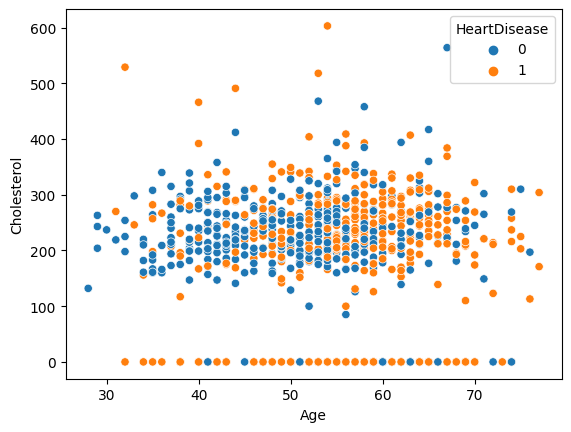

In [19]:
sns.scatterplot(x='Age',y='Cholesterol', hue='HeartDisease', data=data)

<Axes: xlabel='RestingBP', ylabel='MaxHR'>

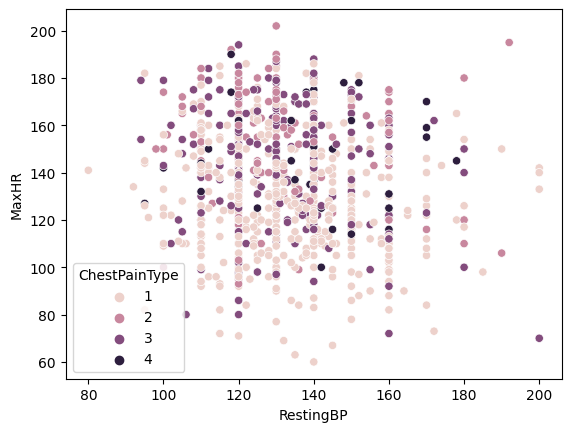

In [20]:
sns.scatterplot(x='RestingBP',y='MaxHR', hue='ChestPainType', data=data)

<Axes: xlabel='MaxHR', ylabel='Count'>

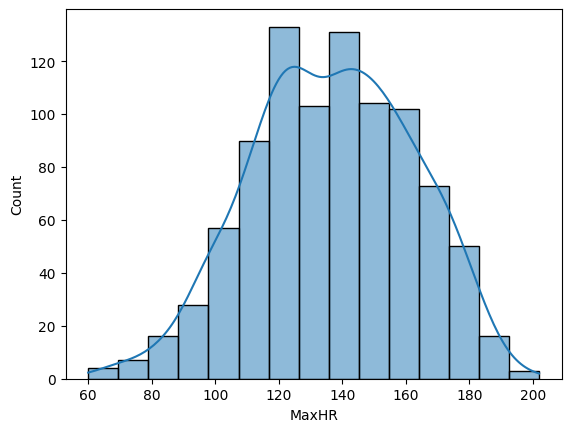

In [21]:
sns.histplot(data['MaxHR'],kde=True,bins=15)

<Axes: xlabel='Sex', ylabel='HeartDisease'>

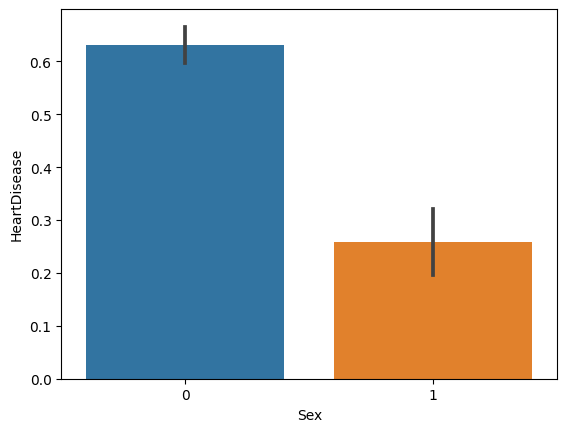

In [22]:
sns.barplot(x='Sex',y='HeartDisease',data=data)

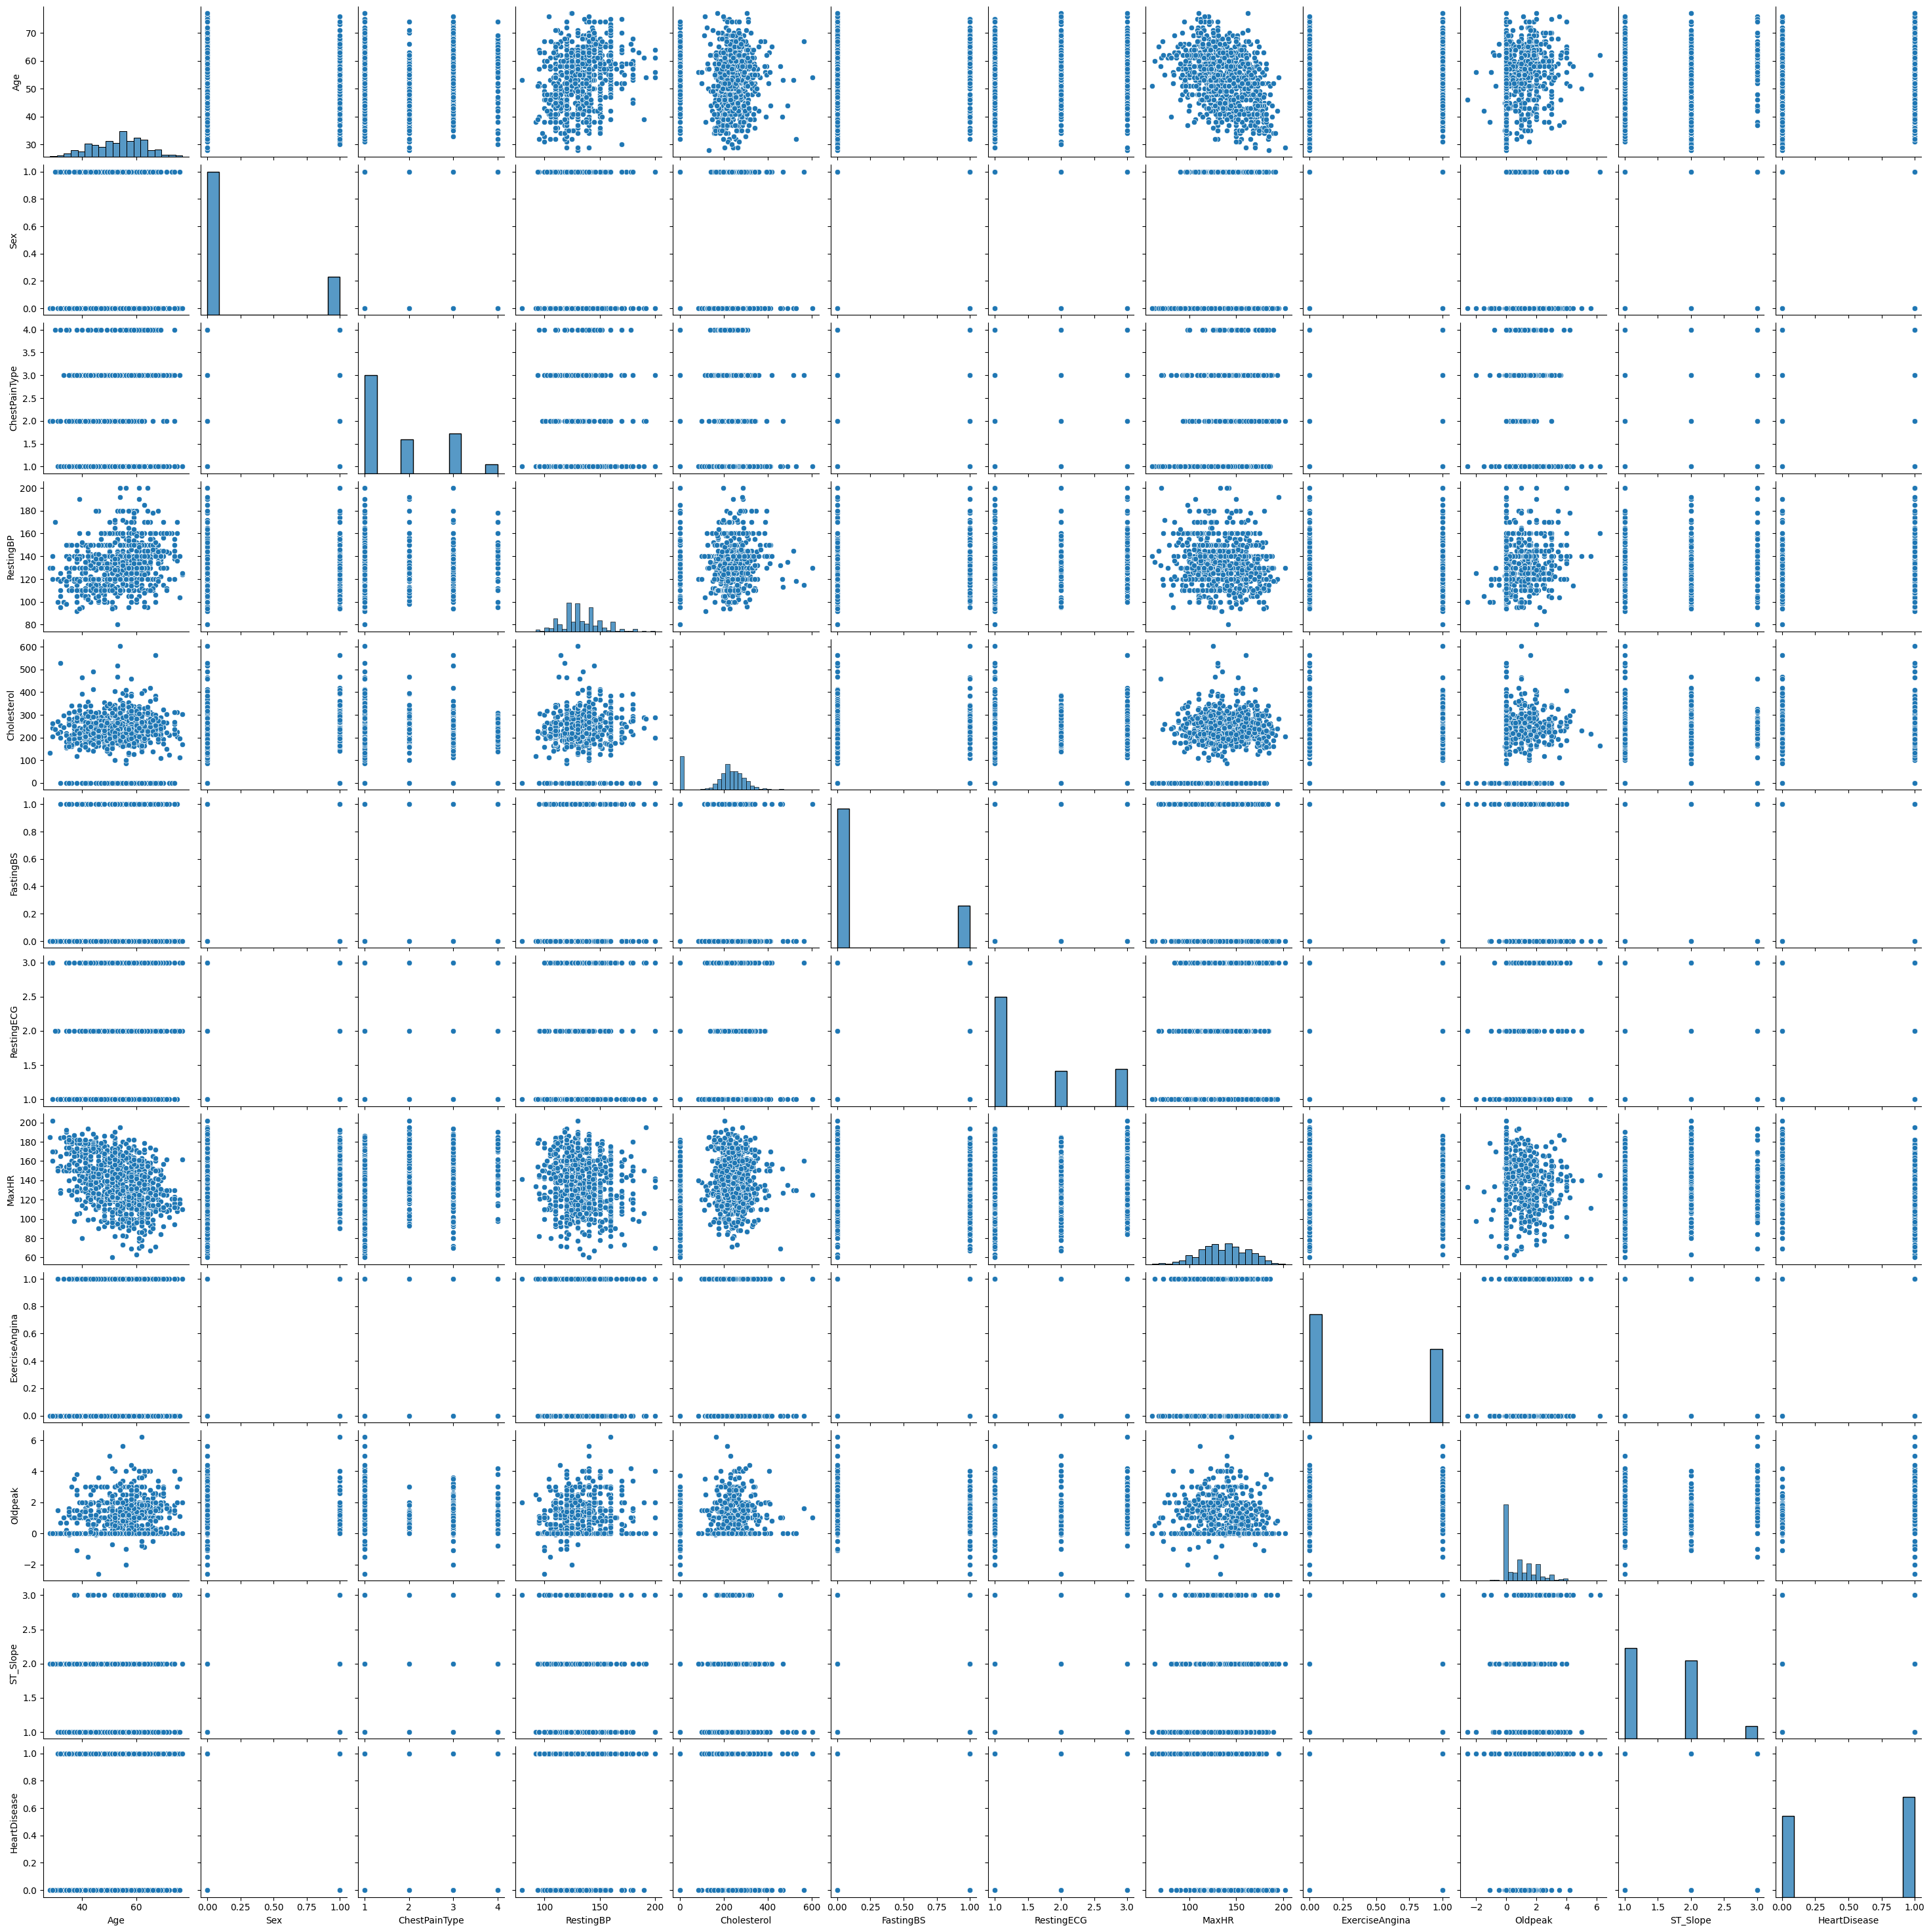

In [23]:
sns.pairplot(data=data)

In [24]:
d=pd.concat([data['Age'],data['RestingBP'], data['Cholesterol'], data['MaxHR'],data['Oldpeak']],axis=1, join='inner')

# scaler=StandardScaler()
# scaler.fit(d)
# d_std=scaler.transform(d)
result=data.drop(columns=['HeartDisease','Age','RestingBP', 'Cholesterol', 'MaxHR','Oldpeak'],axis=1)
X = pd.concat([result, d], axis=1, join="inner")
Y=data['HeartDisease']
# X_train=X[:800]
# X_test=X[800:]
# Y_train=Y[:800]
# Y_test=Y[800:]

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, stratify=Y, test_size=0.2, random_state=3)
X


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0,2,0,1,0,2,40,140,289,172,0.0
1,1,3,0,1,0,1,49,160,180,156,1.0
2,0,2,0,2,0,2,37,130,283,98,0.0
3,1,1,0,1,1,1,48,138,214,108,1.5
4,0,3,0,1,0,2,54,150,195,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...
912,0,4,0,1,0,1,45,110,264,132,1.2
913,0,1,1,1,0,1,68,144,193,141,3.4
914,0,1,0,1,1,1,57,130,131,115,1.2
915,1,2,0,3,0,1,57,130,236,174,0.0


In [25]:
models=[LogisticRegression(max_iter=1000,penalty='l2',C=100), SVC(probability=True),XGBClassifier()]


In [26]:
def evaluation():
  for i in range(1,4):
    models[i-1].fit(X_train,Y_train)
    pred=models[i-1].predict(X_test)
    print(models[i-1],":")
    print('Accuracy score:',accuracy_score(pred, Y_test)*100,'%')
evaluation()


LogisticRegression(C=100, max_iter=1000) :
Accuracy score: 82.6086956521739 %
SVC(probability=True) :
Accuracy score: 72.82608695652173 %
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) :
Accuracy score: 86.41304347826086 %


**************************************************************************************************************************

# `LOGISTIC REGRESSSION OPTIMIZATION:`

In [27]:
def crossvalidation():
  for i in models:
    cv_score_model=cross_val_score(i,X,Y,cv=5)
    #cross_val_score is an inbuilt function which splits the data in 5 chunks
    #4 of those are used for training and the remaining 1 is used for testing
    #for each iteration the subsets are changed and the accuracy is calculated every time
    #the average of those 'cv' iterations is the required final accuarcy score
    print(i)
    print(cv_score_model)
    mean_model=sum(cv_score_model)/len(cv_score_model)
    print(mean_model*100,'%')

In [28]:
crossvalidation()

LogisticRegression(C=100, max_iter=1000)
[0.80978261 0.82065217 0.82513661 0.84153005 0.7704918 ]
81.35186505108102 %
SVC(probability=True)
[0.60869565 0.78804348 0.68852459 0.71584699 0.61748634]
68.371941078641 %
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
[0.8423913  0.83152174 0.83606557

**************************************************************************************************************************

# `SVC OPTIMIZATION:`

In [29]:
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,10,50,100]
}

#classifier=GridSearchCV(models[1],parameters,cv=5)
#classifier.fit(X,Y)

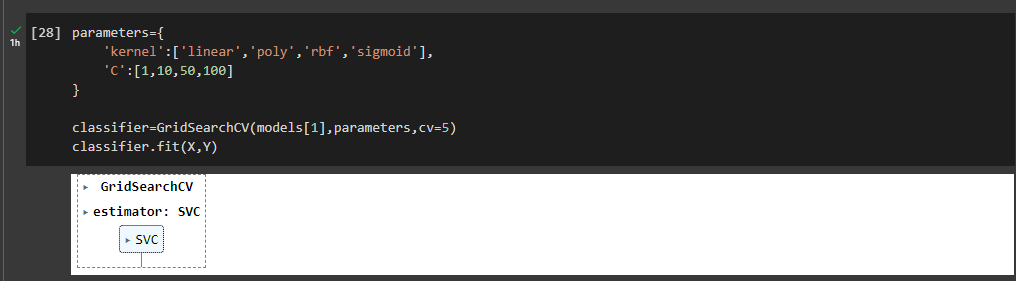

In [30]:
#classifier.cv_results_
'''{'mean_fit_time': array([1.82512604e+01, 8.31261158e-02, 1.00674200e-01, 1.78053713e-01,
        1.32274510e+02, 1.25172091e-01, 1.01635933e-01, 1.14542150e-01,
        2.66870397e+02, 2.52568007e-01, 1.13273001e-01, 1.07319880e-01,
        3.47016821e+02, 3.43393373e-01, 1.21361208e-01, 1.07381248e-01]),
 'std_fit_time': array([3.51552270e+00, 2.74734509e-03, 5.28225515e-03, 9.61173698e-03,
        1.53168103e+01, 1.05613083e-02, 7.01513827e-03, 8.19469045e-03,
        2.94875712e+01, 2.63481202e-02, 7.51917444e-03, 3.52974508e-03,
        1.78276732e+02, 3.14617912e-02, 8.01917125e-03, 5.31691711e-03]),
 'mean_score_time': array([0.00439644, 0.00564146, 0.00838418, 0.00944633, 0.00478511,
        0.00566578, 0.00855131, 0.0078887 , 0.005374  , 0.00532479,
        0.00824618, 0.00760698, 0.00484581, 0.00504255, 0.00858474,
        0.00740485]),
 'std_score_time': array([0.0001932 , 0.00028628, 0.00080379, 0.0005057 , 0.00018545,
        0.00028612, 0.00120972, 0.00048186, 0.00147792, 0.00011538,
        0.00046365, 0.00040765, 0.00069364, 0.00036775, 0.00193336,
        0.0002891 ]),
 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10, 50, 50, 50, 50, 100, 100,
                    100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid', 'linear', 'poly',
                    'rbf', 'sigmoid', 'linear', 'poly', 'rbf', 'sigmoid',
                    'linear', 'poly', 'rbf', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'poly'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'sigmoid'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'poly'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'sigmoid'},
  {'C': 50, 'kernel': 'linear'},
  {'C': 50, 'kernel': 'poly'},
  {'C': 50, 'kernel': 'rbf'},
  {'C': 50, 'kernel': 'sigmoid'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'poly'}, <--- BEST PARAMETERS
  {'C': 100, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'sigmoid'}],
 'split0_test_score': array([0.82065217, 0.6576087 , 0.61413043, 0.375     , 0.81521739,
        0.67391304, 0.63043478, 0.38586957, 0.8423913 , 0.77173913,
        0.70652174, 0.39673913, 0.83152174, 0.78804348, 0.72282609,
        0.39673913]),
 'split1_test_score': array([0.83152174, 0.7826087 , 0.78804348, 0.61413043, 0.81521739,
        0.80434783, 0.79347826, 0.66847826, 0.83152174, 0.9076087 ,
        0.84782609, 0.66304348, 0.82608696, 0.93478261, 0.91304348,
        0.66304348]),
 'split2_test_score': array([0.84782609, 0.66847826, 0.69021739, 0.54891304, 0.83152174,
        0.73913043, 0.73913043, 0.63586957, 0.80978261, 0.77717391,
        0.77717391, 0.63586957, 0.80978261, 0.80434783, 0.77717391,
        0.63586957]),
 'split3_test_score': array([0.84153005, 0.77595628, 0.71584699, 0.45355191, 0.83606557,
        0.79234973, 0.77595628, 0.46994536, 0.82513661, 0.84153005,
        0.81420765, 0.48087432, 0.83060109, 0.84153005, 0.83606557,
        0.47540984]),
 'split4_test_score': array([0.78142077, 0.6284153 , 0.61748634, 0.45901639, 0.79234973,
        0.68852459, 0.65027322, 0.46994536, 0.79234973, 0.75409836,
        0.72131148, 0.47540984, 0.77595628, 0.76502732, 0.74863388,
        0.47540984]),
 'mean_test_score': array([0.82459016, 0.70261345, 0.68514493, 0.49012236, 0.81807436,
        0.73965312, 0.7178546 , 0.52602162, 0.8202364 , 0.81043003,
        0.77340817, 0.53038727, 0.81478974, 0.82674626, 0.79954859,
        0.52929437]),
 'std_test_score': array([0.02346921, 0.06399127, 0.06508026, 0.0829367 , 0.01537919,
        0.05272285, 0.06596495, 0.10797422, 0.01748805, 0.05689836,
        0.05367432, 0.10203927, 0.02093177, 0.05949661, 0.06810853,
        0.10259149]),
 'rank_test_score': array([ 2, 11, 12, 16,  4,  9, 10, 15,  3,  6,  8, 13,  5,  1,  7, 14],
       dtype=int32)}
'''

"{'mean_fit_time': array([1.82512604e+01, 8.31261158e-02, 1.00674200e-01, 1.78053713e-01,\n        1.32274510e+02, 1.25172091e-01, 1.01635933e-01, 1.14542150e-01,\n        2.66870397e+02, 2.52568007e-01, 1.13273001e-01, 1.07319880e-01,\n        3.47016821e+02, 3.43393373e-01, 1.21361208e-01, 1.07381248e-01]),\n 'std_fit_time': array([3.51552270e+00, 2.74734509e-03, 5.28225515e-03, 9.61173698e-03,\n        1.53168103e+01, 1.05613083e-02, 7.01513827e-03, 8.19469045e-03,\n        2.94875712e+01, 2.63481202e-02, 7.51917444e-03, 3.52974508e-03,\n        1.78276732e+02, 3.14617912e-02, 8.01917125e-03, 5.31691711e-03]),\n 'mean_score_time': array([0.00439644, 0.00564146, 0.00838418, 0.00944633, 0.00478511,\n        0.00566578, 0.00855131, 0.0078887 , 0.005374  , 0.00532479,\n        0.00824618, 0.00760698, 0.00484581, 0.00504255, 0.00858474,\n        0.00740485]),\n 'std_score_time': array([0.0001932 , 0.00028628, 0.00080379, 0.0005057 , 0.00018545,\n        0.00028612, 0.00120972, 0.00048186

**************************************************************************************************************************

# `XGBOOST OPTIMIZATION:`

In [31]:
from hyperopt import hp, STATUS_OK, fmin, tpe, space_eval, Trials
from sklearn.model_selection import StratifiedKFold

In [32]:
space = {
    'learning_rate': hp.choice('learning_rate', [ 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [ 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [ 0.1, 1, 10, 100])
}
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

def objective(params):
    
    xgboost = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=Y_train, 
                            cv=kfold, 
                            scoring='accuracy', 
                            n_jobs=-1).mean()
    loss = - score
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())


100%|██████████| 48/48 [00:13<00:00,  3.69trial/s, best loss: -0.8867514218802275]


In [33]:
print(best)
print(space_eval(space, best))

{'colsample_bytree': 2, 'gamma': 2, 'learning_rate': 0, 'max_depth': 4, 'reg_alpha': 0, 'reg_lambda': 1}
{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 15, 'reg_alpha': 0.1, 'reg_lambda': 1}


**************************************************************************************************************************

# `OPTIMAL LOGISTIC REGRESSION SETTINGS:`

In [34]:
cross_lr=cross_val_score(models[0],X,Y,cv=5)
print(cross_lr)
Y_pred_lr=models[0].predict(X_test)
mean_model=sum(cross_lr)/len(cross_lr)
print('Final Accuracy:',mean_model*100,'%')

[0.80978261 0.82065217 0.82513661 0.84153005 0.7704918 ]
Final Accuracy: 81.35186505108102 %


Feature: 0, Score: 0.01854
Feature: 1, Score: 0.03119
Feature: 2, Score: 0.01897
Feature: 3, Score: -0.00218
Feature: 4, Score: 0.03272
Feature: 5, Score: 0.06020
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00022
Feature: 8, Score: 0.01527
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.06041


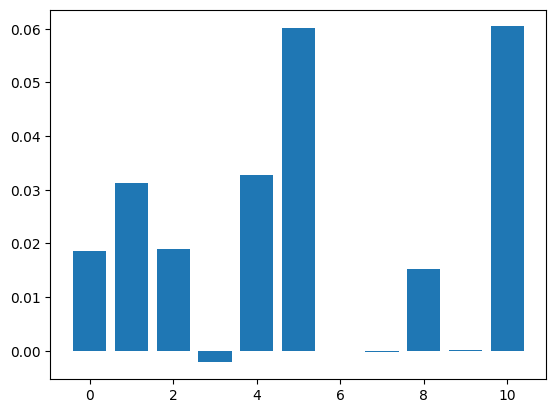

In [35]:
results = permutation_importance(models[0], X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

**************************************************************************************************************************

# `OPTIMAL SUPPORT VECTOR CLASSIFIER SETTINGS:`

In [36]:
svc_model=SVC(C=100, kernel='poly', probability=True)
svc_model.fit(X_train,Y_train)
Y_pred_svc=svc_model.predict(X_test)
print('Final Accuracy:',accuracy_score(Y_pred_svc,Y_test)*100,'%')

Final Accuracy: 83.15217391304348 %


Feature: 0, Score: 0.00611
Feature: 1, Score: 0.02661
Feature: 2, Score: 0.00131
Feature: 3, Score: 0.00044
Feature: 4, Score: 0.01483
Feature: 5, Score: 0.03730
Feature: 6, Score: 0.01112
Feature: 7, Score: 0.00109
Feature: 8, Score: 0.07503
Feature: 9, Score: 0.01854
Feature: 10, Score: 0.05976


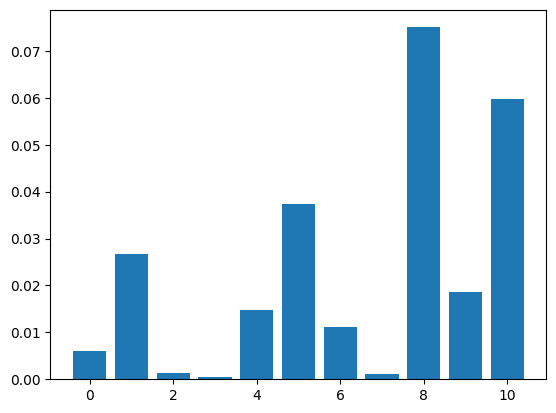

In [37]:
results = permutation_importance(svc_model, X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# `OPTIMAL XGBOOST CLASSIFIER SETTINGS:`

In [38]:
xgboost_model = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,Y_train)
Y_pred_xgb=xgboost_model.predict(X_test)
print('Final Accuracy:',accuracy_score(Y_pred_xgb,Y_test)*100,'%')

Final Accuracy: 85.32608695652173 %


Feature: 0, Score: 0.01876
Feature: 1, Score: 0.02835
Feature: 2, Score: 0.00218
Feature: 3, Score: 0.00698
Feature: 4, Score: 0.02094
Feature: 5, Score: 0.05954
Feature: 6, Score: 0.01134
Feature: 7, Score: 0.01374
Feature: 8, Score: 0.03948
Feature: 9, Score: 0.01854
Feature: 10, Score: 0.02312


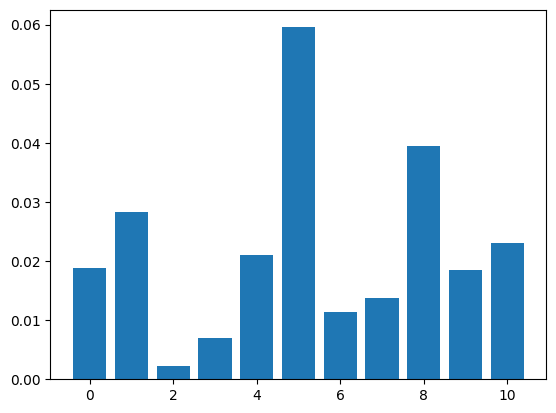

In [39]:
results = permutation_importance(xgboost_model, X, Y, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()



**************************************************************************************************************************

# `RESULT VISUALIZATION:`

## `LOGISTIC REGRESSION AFTER CROSS VALIDATION:`

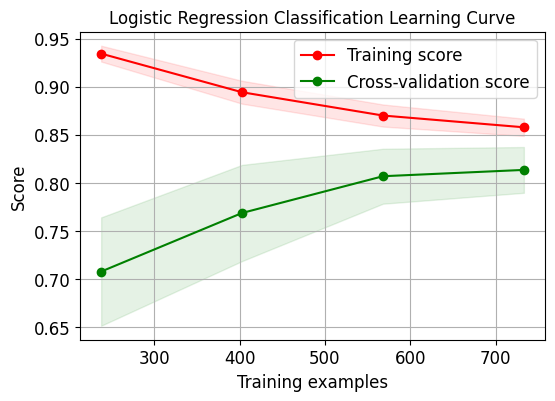

In [40]:
skplt.estimators.plot_learning_curve(models[0], X, Y,
                                     cv=5, shuffle=False, scoring="accuracy",n_jobs=-1,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Logistic Regression Classification Learning Curve");

##`SVC AFTER CROSS VALIDATION:`

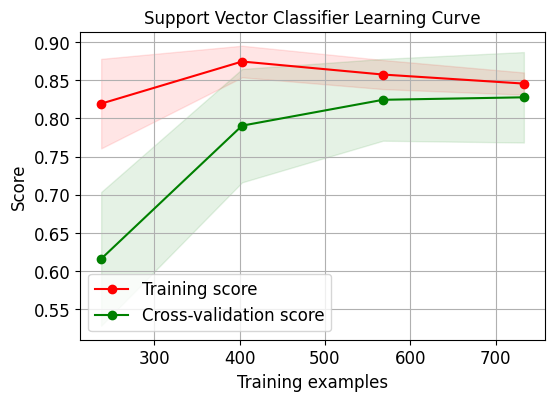

In [41]:
skplt.estimators.plot_learning_curve(svc_model, X, Y,
                                     cv=5, shuffle=False, scoring="accuracy",n_jobs=-1,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Support Vector Classifier Learning Curve");

## `SVC AFTER HYPERPARAMETER TUNING:`

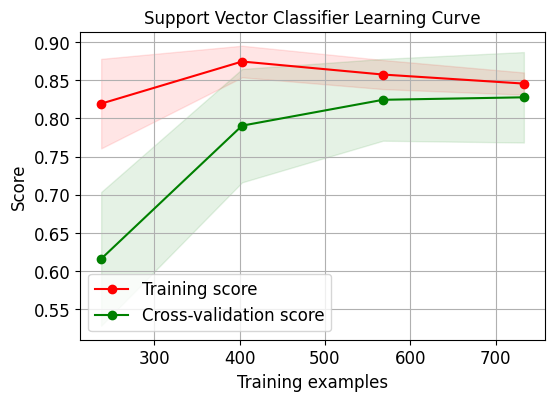

In [42]:
skplt.estimators.plot_learning_curve(svc_model, X, Y,
                                     cv=5, shuffle=False, scoring="accuracy",n_jobs=-1,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Support Vector Classifier Learning Curve");

## `XGBOOST CLASSIFIER AFTER CROSS VALIDATION:`

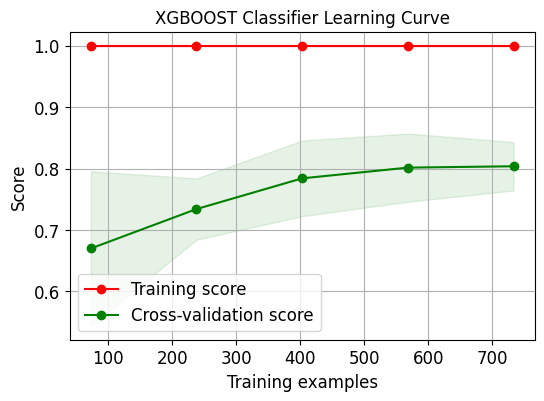

In [43]:
skplt.estimators.plot_learning_curve(models[2], X, Y,
                                     cv=5, shuffle=False, scoring="accuracy",n_jobs=-1,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="XGBOOST Classifier Learning Curve");

## `XGBOOST CLASSIFIER AFTER HYPERPARAMETER TUNING:`

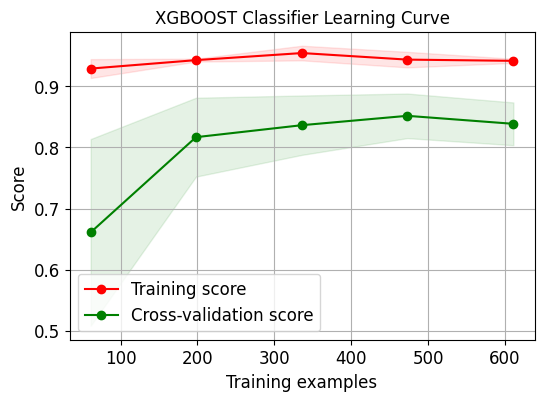

In [44]:
skplt.estimators.plot_learning_curve(xgboost_model, X, Y,
                                     cv=3, shuffle=False, scoring="accuracy",n_jobs=-1,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="XGBOOST Classifier Learning Curve");

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


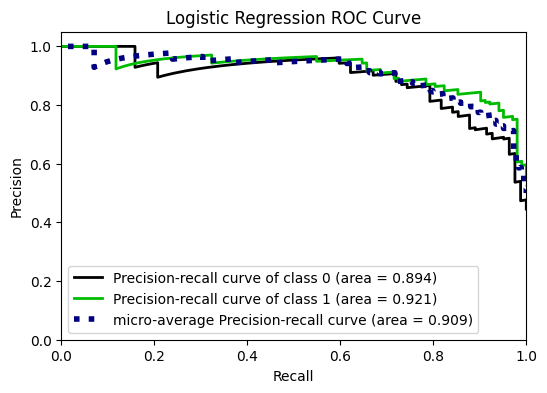

In [45]:
Y_test_probs1=models[0].predict_proba(X_test)
Y_test_probs2=svc_model.predict_proba(X_test)
Y_test_probs3=xgboost_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(Y_test, Y_test_probs1,
                                          title="Logistic Regression ROC Curve", 
                                          figsize=(6,4));

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


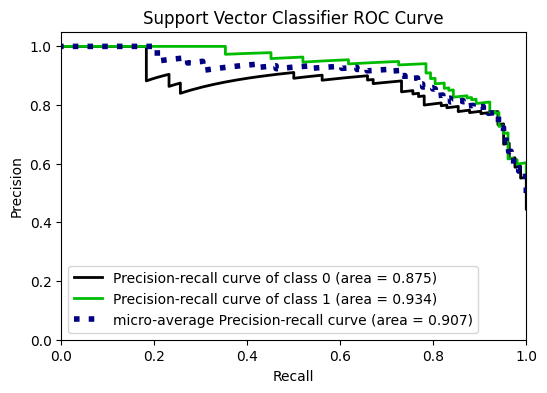

In [46]:
skplt.metrics.plot_precision_recall_curve(Y_test, Y_test_probs2, 
                                          title="Support Vector Classifier ROC Curve", 
                                          figsize=(6,4));

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


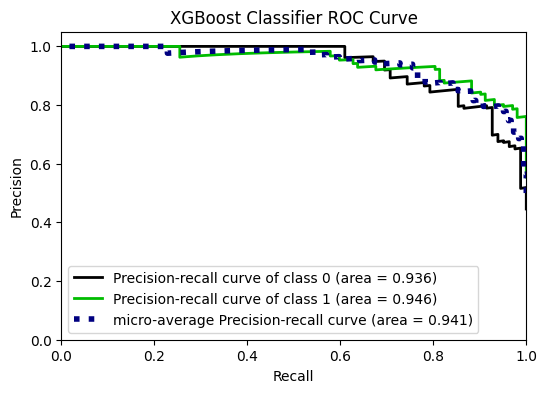

In [47]:
skplt.metrics.plot_precision_recall_curve(Y_test, Y_test_probs3, 
                                          title="XGBoost Classifier ROC Curve", 
                                          figsize=(6,4));

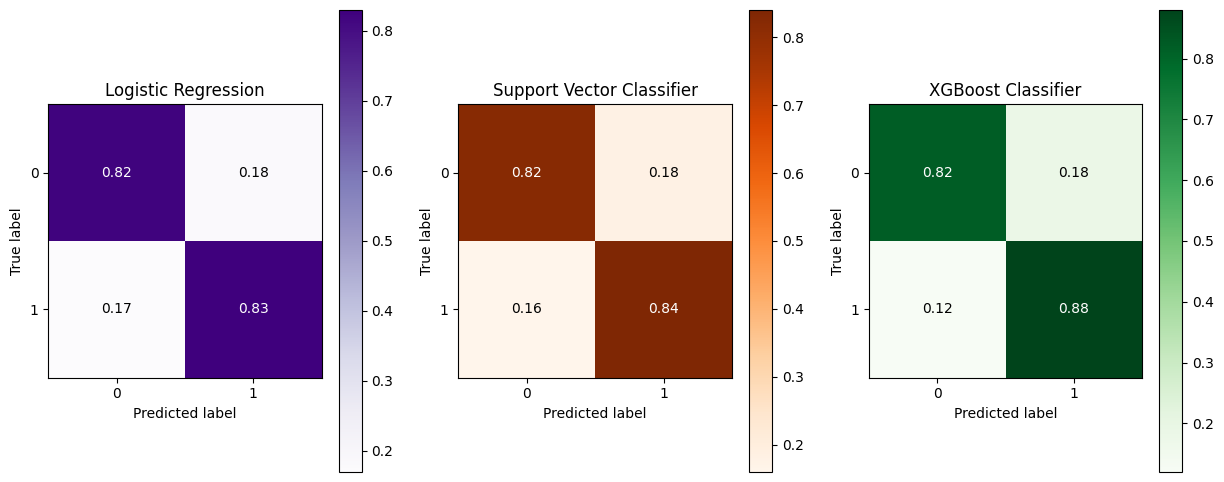

In [48]:
import matplotlib.pyplot as plt

pred1= models[0].predict(X_test)
pred2= svc_model.predict(X_test)
pred3= xgboost_model.predict(X_test)
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
skplt.metrics.plot_confusion_matrix(Y_test, pred1,
                                    normalize=True,
                                    title="Logistic Regression",
                                    cmap="Purples",
                                    ax=ax1);

ax2 = fig.add_subplot(132)
skplt.metrics.plot_confusion_matrix(Y_test, pred2,
                                    normalize=True,
                                    title="Support Vector Classifier",
                                    cmap="Oranges",
                                    ax=ax2);

ax3 = fig.add_subplot(133)
skplt.metrics.plot_confusion_matrix(Y_test, pred3,
                                    normalize=True,
                                    title="XGBoost Classifier",
                                    cmap="Greens",
                                    ax=ax3);

In [49]:
print('LOGISTIC REGRESSION:')
print('F1 Score:',f1_score(Y_pred_lr,Y_test))
print()
print('SUPPORT VECTOR MACHINES:')
print('F1 Score:',f1_score(Y_pred_svc,Y_test))
print()
print('XGBOOST:')
print('F1 Score:',f1_score(Y_pred_xgb,Y_test))
print()


LOGISTIC REGRESSION:
F1 Score: 0.8415841584158417

SUPPORT VECTOR MACHINES:
F1 Score: 0.8472906403940887

XGBOOST:
F1 Score: 0.8695652173913043



In [50]:
import pickle
filename="model_lr.sav" 
pickle.dump(models[0],open(filename,'wb'))  

filename="model_svc.sav" #saved file
pickle.dump(svc_model,open(filename,'wb'))  

filename="model_xgb.sav" #saved file
pickle.dump(xgboost_model,open(filename,'wb'))  